In [3]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [10]:
# Read in test/train data
train=pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Ride_Rating_Prediction/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Ride_Rating_Prediction/test.csv")
# Make copies
train_original=train.copy()
test_original=test.copy()
# Missing value treatment for plotting data
train = train.fillna(0)
test = test.fillna(0)
print (train.dtypes)
print ("Shape of the train data "+str(train.shape))

Unnamed: 0                           int64
customer_id                          int64
driver_id                            int64
creation_date                       object
booking_source                       int64
car_type                             int64
estimated_distance                 float64
distance_travelled                 float64
distance_travelled_while_moving    float64
estimated_duration                   int64
duration_time                        int64
wait_time_initial                    int64
wait_time_in_journey                 int64
estimated_price                    float64
price                              float64
is_cancelled                         int64
rating                               int64
was_rated                            int64
dtype: object
Shape of the train data (51083, 18)


In [12]:
train.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1


In [15]:
test.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled
0,0,60956364,1761208,2017-09-08 15:11:09.000,1,1,0.0,14.58090,13.63340,0,35,0,14,0.0,20.581726,0
1,1,60777268,1863028,2017-09-08 15:17:00.000,2,1,0.0,3.11665,2.78458,0,9,1,3,0.0,10.968003,0
2,2,55197228,1362580,2017-09-08 20:54:56.000,1,1,0.0,8.15772,7.48073,0,16,0,5,0.0,15.186146,0
3,3,53877020,1917600,2017-09-09 07:15:20.000,2,1,0.0,9.10110,8.39143,0,29,2,14,0.0,17.724573,0
4,4,12747160,2063780,2017-09-09 10:38:21.000,2,1,0.0,16.02280,15.32200,0,57,1,34,0.0,23.929555,0


In [24]:
train.describe()

,Unnamed: 0,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
count,51083.000000,5.108300e+04,5.108300e+04,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000
mean,25541.000000,3.701478e+07,1.581080e+06,1.509817,1.111348,0.917110,6.810667,6.292355,1.929370,16.265392,2.471370,6.056301,1.681055,13.718933,0.042774,3.263121,0.682752
std,14746.536237,1.831212e+07,4.461198e+05,0.506677,0.446606,4.409016,6.671300,6.493241,6.426472,14.043821,2.960479,8.679217,5.413482,4.628049,0.202348,2.297473,0.465410
min,0.000000,4.092000e+05,5.093000e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12770.500000,2.047212e+07,1.301384e+06,1.000000,1.000000,0.000000,3.199195,2.815185,0.000000,8.000000,0.000000,2.000000,0.000000,10.860325,0.000000,0.000000,0.000000
50%,25541.000000,3.970655e+07,1.720492e+06,2.000000,1.000000,0.000000,5.358200,4.852870,0.000000,13.000000,2.000000,4.000000,0.000000,12.674608,0.000000,5.000000,1.000000
75%,38311.500000,5.403015e+07,1.953104e+06,2.000000,1.000000,0.000000,8.565545,7.915150,0.000000,21.000000,3.000000,8.000000,0.000000,16.287307,0.000000,5.000000,1.000000
max,51082.000000,6.388676e+07,2.203644e+06,4.000000,6.000000,347.556000,325.504000,324.568000,232.000000,666.000000,73.000000,524.000000,72.522902,50.540852,1.000000,5.000000,1.000000


In [25]:
print(train.shape)
print(test.shape)



(51083, 18)
(17201, 16)


In [27]:
train['rating'].value_counts()

5    30298
0    16206
4     3086
1      706
3      576
2      211
Name: rating, dtype: int64

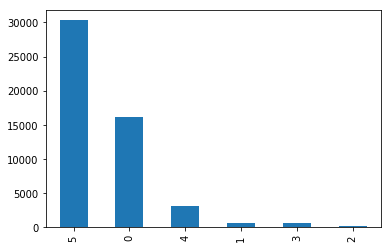

In [32]:
train['rating'].value_counts().plot.bar()

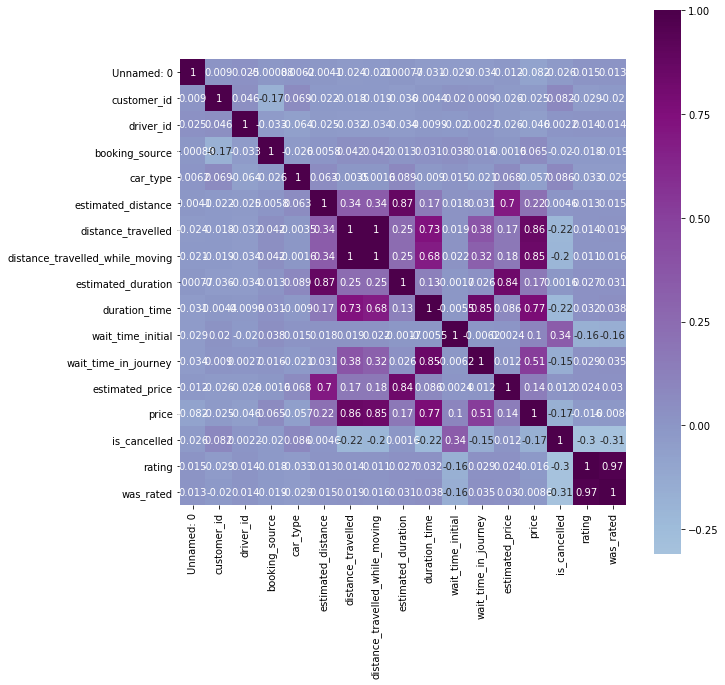

In [33]:
matrix = train.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matrix, square = True, center = 0, annot = True, cmap="BuPu")